# Modelo con XG BOOST

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier


In [2]:
# Insertamos esta línea de código para que los números aparezcan separados por comas

pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Cargamos los datos

datos = pd.read_csv("../datos_escalados.csv")

In [4]:
# Verificamos que se carguen bien los datos

print(datos.shape)
datos.head(2)

(7032, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.00,0.00,0.12,0.00,0.00,1.00,0.00,0.00,1.00,1.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.46,0.39,0.22,0.00,0.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Dividimos el conjunto de entrenamiento en Entrenamiento y Testing

In [5]:
# Elejimos a todas las variables excepto el Churn para el entrenamiento

X = datos.drop("Churn", axis = 1)
y = datos["Churn"].values

In [8]:
# Separamos en entrenamiento y prueba con train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

/home/luisb/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [9]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [11]:
# Medimos el accuracy

predicciones_testing = model.predict(X_test)
accuracy = (metrics.accuracy_score(y_test, predicciones_testing))

print("El accuracy del modelo es de " + str(accuracy*100) + "%"  )

El accuracy del modelo es de 77.96208530805687%


In [12]:
# Generamos la matriz de confusión

matriz_confusion = confusion_matrix(y_test, predicciones_testing)

<AxesSubplot:>

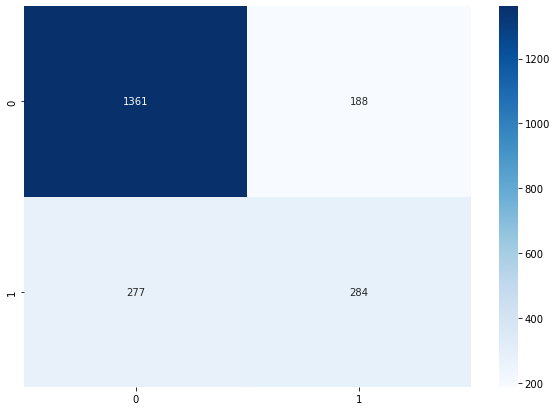

In [19]:
# Hacemos la gráfica de la matriz de confusión

plt.figure(figsize = (10,7))
sns.heatmap(matriz_confusion, annot=True, cmap = 'Blues', fmt='g')

In [14]:
# Revisamos otras métricas como recall y F1

predicciones = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1549
         1.0       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

